In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime

In [ ]:
sns.set()
mpl.rcParams['figure.figsize'] = (16,5)

In [ ]:
data = pd.read_csv('data_ER_Reg_and_KPIs_2.csv')

In [ ]:
data.set_index("Case-Id")

In [ ]:
data.describe()

In [6]:
data.duration.hist(bins=1000)
plt.show()

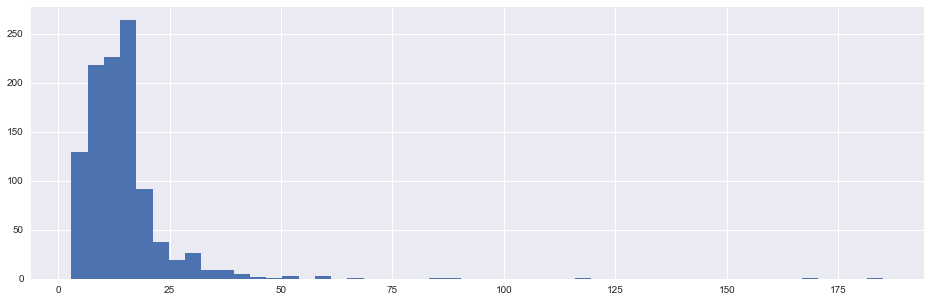

In [7]:
data.number_of_steps.hist(bins=50)
plt.show()

In [8]:
data_900 = data[data.duration < 900]
data_300 = data[data.duration < 300]
data_100 = data[data.duration < 1000]


data_0_10000 = data[(data.duration > 0)&(data.duration < 10000)]
data_10_300 = data[(data.duration > 10)&(data.duration < 300)]


data_0_100 = data[(data.duration > 0)&(data.duration < 100)]
data_0_300 = data[(data.duration > 0)&(data.duration < 300)]

# number of steps
data_0_30 = data[data.number_of_steps < 30]



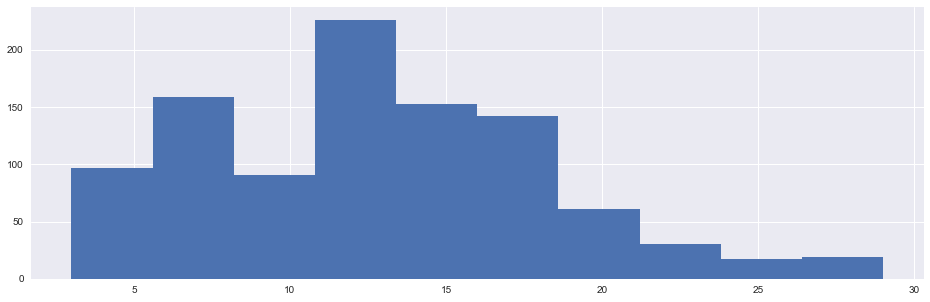

In [9]:
data_0_30.number_of_steps.hist(bins=10)
plt.show()

In [10]:
target = pd.DataFrame(data_0_30.number_of_steps)

In [11]:
df_input_var = data_0_30.drop(['duration', 'number_of_steps'], axis=1)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error


In [52]:
#StdScaler = StandardScaler()

In [82]:
X = np.array(df_input_var.values)
X = X[:,2:-1] # exclude age
y = np.array(target.values)

#X_scaled = StdScaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [83]:
reg = KernelRidge(alpha=20)

reg.fit(X_train, y_train)

KernelRidge(alpha=20, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [84]:
y_pred = reg.predict(X_test)
r2 = reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

In [85]:
print(r2,mse)

-0.244733728069 32.8183325023


In [70]:
X

array([[ 1.,  1.,  1., ...,  0.,  1.,  1.],
       [ 0.,  1.,  1., ...,  0.,  1.,  1.],
       [ 1.,  1.,  1., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [71]:
X_train

array([[ 0.,  0.,  1., ...,  0.,  1.,  1.],
       [ 1.,  1.,  1., ...,  0.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  1.,  1.],
       [ 1.,  1.,  1., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

alpha_space = np.logspace(-4, 30, 100)
r2_scores = []
ridge_scores_std = []

reg = KernelRidge()


for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    reg.alpha = alpha
    
    reg.fit(X_train, y_train)
    # Perform 10-fold CV: ridge_cv_scores
    #ridge_cv_scores = cross_val_score(reg, X, y, cv=10)
    
    y_pred = reg.predict(X_test)
    r2 = reg.score(X_test, y_test)
    # Append the mean of ridge_cv_scores to ridge_scores
    r2_scores.append((r2))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

print("r2 " + str(r2))

plt.plot(alpha_space,r2_scores)
plt.show()